<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%203%20Convolutional%20Neural%20Network/03_Practice_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 03. Computer vision & convolutional neural networks in TensorFlow Exercises

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).
  * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

    - Convolution: Mathematical operation on two functions that produces a third function
    - Pooling: Average pooling is another type of pooling, and that's where you take the average value from each region rather than the max (max pooling).

2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size? Ans: `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
  * What is the stride? ANS: `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
  * How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.


## 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

### Get the data

I have my own image classifier dataset in my drive. This dataset contains 22 images of baseball and another 22 images of basketball (not a baseball).

The goal is to train a classifier that will classify between baseball and not basketball.

Likewise feel free to use your own dataset.

In [ ]:
import zipfile

!wget https://github.com/SGhuman123/TensorFlow_HW/blob/main/CNN_HW.zip?raw=true

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("CNN_HW.zip?raw=true")
zip_ref.extractall()
zip_ref.close()

--2023-09-12 12:22:10--  https://github.com/SGhuman123/CNN_HW/blob/main/CNN_HW.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SGhuman123/CNN_HW/raw/main/CNN_HW.zip [following]
--2023-09-12 12:22:10--  https://github.com/SGhuman123/CNN_HW/raw/main/CNN_HW.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SGhuman123/CNN_HW/main/CNN_HW.zip [following]
--2023-09-12 12:22:11--  https://raw.githubusercontent.com/SGhuman123/CNN_HW/main/CNN_HW.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3208186 (3.1M) [a

### Get our workspace ready

In [ ]:
# Import TensorFlow into Colab
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.13.0


## Inspect the data (become one with it)

In [ ]:
!ls CNN_HW

test  train


In [ ]:
!ls CNN_HW/test

baseball  basketball


In [ ]:
!ls CNN_HW/test/baseball

benjamin-hershey-qegSxvH9U9Y-unsplash.jpg
caitlin-conner-i_vYjW5A6NU-unsplash.jpg
chris-briggs-FobzAZJGM9M-unsplash.jpg
hongbin-gHzcmEa25WU-unsplash.jpg
jose-francisco-morales-hKzmPs8Axh8-unsplash.jpg
thomas-park-Nl942-bo_4o-unsplash.jpg


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("CNN_HW"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'CNN_HW'.
There are 2 directories and 1 images in 'CNN_HW/train'.
There are 0 directories and 15 images in 'CNN_HW/train/basketball'.
There are 0 directories and 15 images in 'CNN_HW/train/baseball'.
There are 2 directories and 1 images in 'CNN_HW/test'.
There are 0 directories and 7 images in 'CNN_HW/test/basketball'.
There are 0 directories and 7 images in 'CNN_HW/test/baseball'.


To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("CNN_HW/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
# class_names = class_names[1:] # This is to remove '.DS_Store'
print(class_names)

['.DS_Store' 'baseball' 'basketball']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['caitlin-conner-i_vYjW5A6NU-unsplash.jpg']
Image shape: (426, 640, 3)


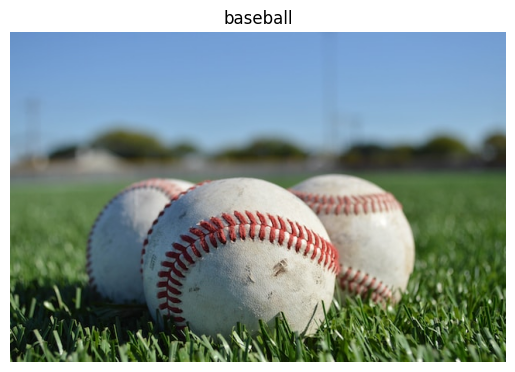

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="CNN_HW/test/",
                        target_class="baseball")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(426, 640, 3), dtype=uint8, numpy=
array([[[101, 144, 199],
        [101, 144, 199],
        [101, 144, 199],
        ...,
        [114, 155, 207],
        [114, 155, 207],
        [114, 155, 207]],

       [[101, 144, 199],
        [101, 144, 199],
        [101, 144, 199],
        ...,
        [114, 155, 207],
        [114, 155, 207],
        [114, 155, 207]],

       [[101, 144, 199],
        [102, 145, 200],
        [102, 145, 200],
        ...,
        [115, 156, 208],
        [115, 156, 208],
        [115, 156, 208]],

       ...,

       [[125, 155,  95],
        [100, 127,  76],
        [ 45,  62,  30],
        ...,
        [ 55,  90,  34],
        [ 30,  58,  20],
        [ 25,  49,  23]],

       [[127, 157,  95],
        [111, 138,  83],
        [ 77,  98,  59],
        ...,
        [ 71, 106,  48],
        [ 42,  70,  32],
        [ 19,  44,  15]],

       [[133, 163,  99],
        [120, 148,  90],
        [ 88, 109,  68],
        ...,
        [ 75, 111,  5

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(426, 640, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.39607843, 0.56470588, 0.78039216],
        [0.39607843, 0.56470588, 0.78039216],
        [0.39607843, 0.56470588, 0.78039216],
        ...,
        [0.44705882, 0.60784314, 0.81176471],
        [0.44705882, 0.60784314, 0.81176471],
        [0.44705882, 0.60784314, 0.81176471]],

       [[0.39607843, 0.56470588, 0.78039216],
        [0.39607843, 0.56470588, 0.78039216],
        [0.39607843, 0.56470588, 0.78039216],
        ...,
        [0.44705882, 0.60784314, 0.81176471],
        [0.44705882, 0.60784314, 0.81176471],
        [0.44705882, 0.60784314, 0.81176471]],

       [[0.39607843, 0.56470588, 0.78039216],
        [0.4       , 0.56862745, 0.78431373],
        [0.4       , 0.56862745, 0.78431373],
        ...,
        [0.45098039, 0.61176471, 0.81568627],
        [0.45098039, 0.61176471, 0.81568627],
        [0.45098039, 0.61176471, 0.81568627]],

       ...,

       [[0.49019608, 0.60784314, 0.37254902],
        [0.39215686, 0.49803922, 0.29803922],
        [0.17647059, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 & 1, also called )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setyp paths to our data directories
train_dir = "/content/CNN_HW/train"
test_dir = "CNN_HW/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 28 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6934 - accuracy: 0.5357 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 0.6467 - accuracy: 0.8571 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 0.5945 - accuracy: 0.7857 - val_loss: 0.7225 - val_accuracy: 0.5833
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.5394 - accuracy: 0.8929 - val_loss: 0.7502 - val_accuracy: 0.4167
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.4805 - accuracy: 0.9286 - val_loss: 0.7866 - val_accuracy: 0.5000


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6983 - accuracy: 0.5357 - val_loss: 6.6559 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 686ms/step - loss: 5.0911 - accuracy: 0.5000 - val_loss: 12.1588 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 710ms/step - loss: 9.6081 - accuracy: 0.5000 - val_loss: 4.8783 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 550ms/step - loss: 4.4093 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 603ms/step - loss: 0.6717 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7177 - accuracy: 0.4286 - val_loss: 2.0880 - val_accuracy: 0.4167
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.6998 - accuracy: 0.8214 - val_loss: 54.2632 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 971ms/step - loss: 48.1991 - accuracy: 0.5000 - val_loss: 13.0573 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 919ms/step - loss: 10.6615 - accuracy: 0.5000 - val_loss: 31.5717 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 859ms/step - loss: 19.4441 - accuracy: 0.5000 - val_loss: 25.4413 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Become one with the data (visualize, visualize, visualize)

['ben-hershey-xJPCSJkxRys-unsplash.jpg']
Image shape: (425, 640, 3)
['jeremy-wallace-_XjW3oN8UOE-unsplash.jpg']
Image shape: (853, 640, 3)


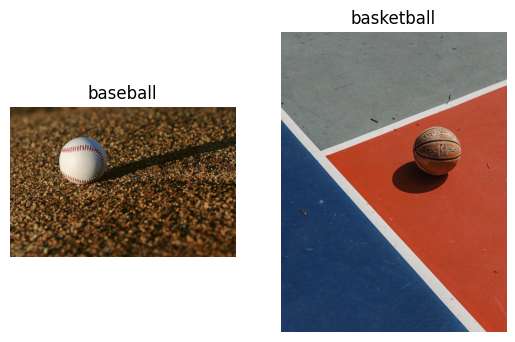

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
baseball_img = view_random_image("CNN_HW/train/", "baseball")
plt.subplot(1, 2, 2)
basketball_img = view_random_image("CNN_HW/train/", "basketball")

## Preproces the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "CNN_HW/train/"
test_dir = "CNN_HW/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them inot batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=2) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=2)

Found 28 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(2, 2)

In [ ]:
# How many batches are there?
len(train_data)

14

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> Note: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # the size of a sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(14, 6)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
14/14 [==============================] - 2s 115ms/step - loss: 7.2114 - accuracy: 0.5714 - val_loss: 6.1120 - val_accuracy: 0.5000
Epoch 2/5
14/14 [==============================] - 1s 104ms/step - loss: 1.5717 - accuracy: 0.6071 - val_loss: 0.7299 - val_accuracy: 0.5000
Epoch 3/5
14/14 [==============================] - 1s 102ms/step - loss: 0.5574 - accuracy: 0.8214 - val_loss: 0.7022 - val_accuracy: 0.3333
Epoch 4/5
14/14 [==============================] - 1s 104ms/step - loss: 0.4907 - accuracy: 1.0000 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 5/5
14/14 [==============================] - 2s 177ms/step - loss: 0.3140 - accuracy: 0.9643 - val_loss: 0.5915 - val_accuracy: 0.6667


In [ ]:
model_1.evaluate(test_data)

6/6 [==============================] - 0s 45ms/step - loss: 0.7866 - accuracy: 0.5000


[0.7866049408912659, 0.5]

### Evaluating our model

It looks like our model is learning something, let's evaluate it.

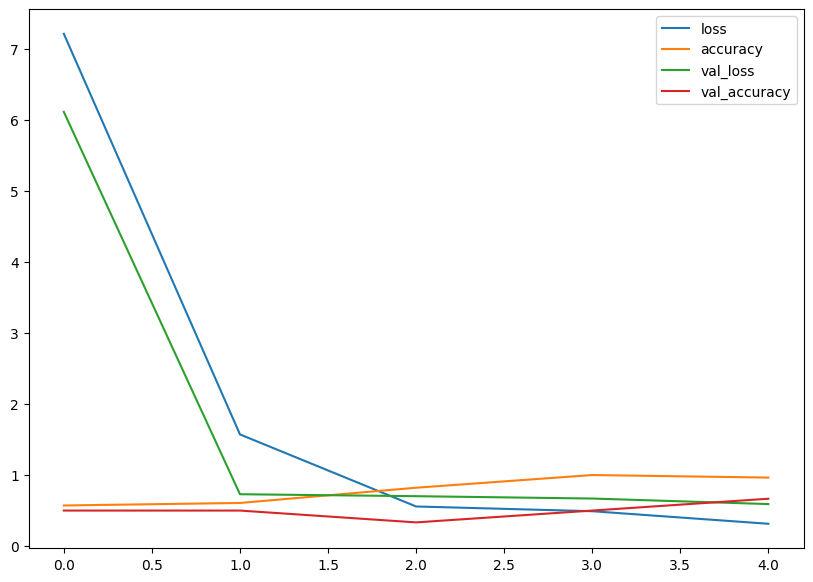

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

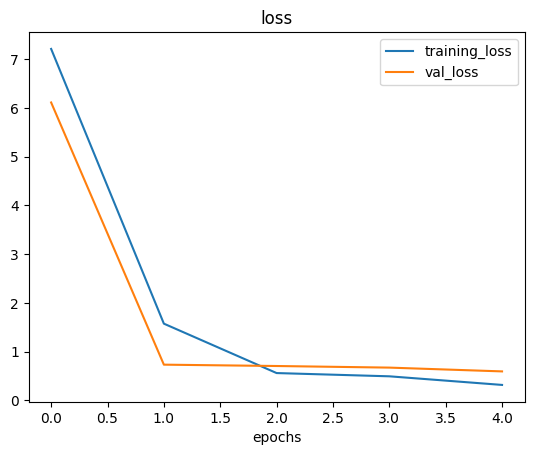

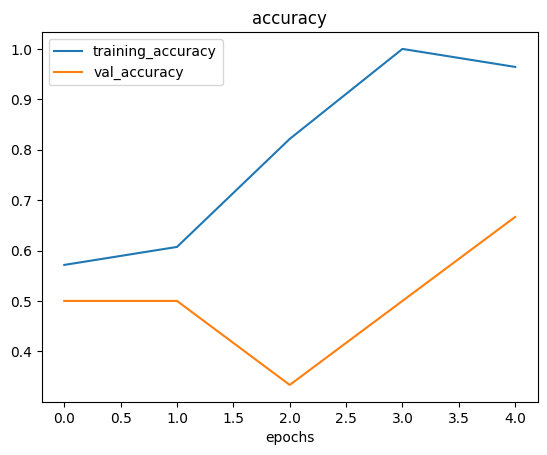

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(223, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
14/14 [==============================] - 2s 59ms/step - loss: 0.7820 - accuracy: 0.3929 - val_loss: 0.7523 - val_accuracy: 0.5000
Epoch 2/5
14/14 [==============================] - 1s 47ms/step - loss: 0.6757 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 3/5
14/14 [==============================] - 1s 48ms/step - loss: 0.6471 - accuracy: 0.5714 - val_loss: 0.6910 - val_accuracy: 0.4167
Epoch 4/5
14/14 [==============================] - 1s 47ms/step - loss: 0.6091 - accuracy: 0.7143 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 5/5
14/14 [==============================] - 1s 48ms/step - loss: 0.5388 - accuracy: 0.7143 - val_loss: 0.7011 - val_accuracy: 0.6667


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 221, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


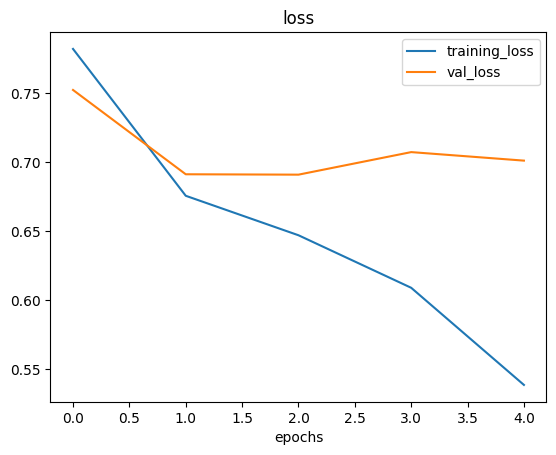

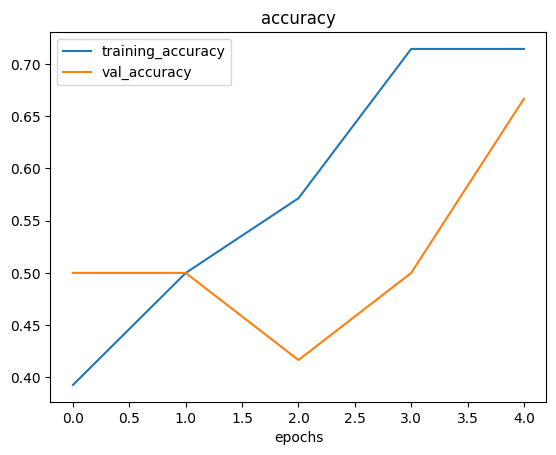

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale=1/255.)

> Question: What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 28 images belonging to 2 classes.
Non-augmented training data:
Found 28 images belonging to 2 classes.
Non-augmented test data:
Found 12 images belonging to 2 classes.


Note: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 11


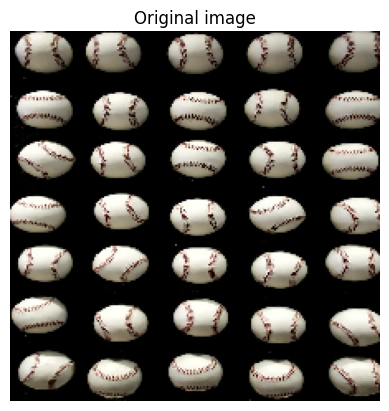

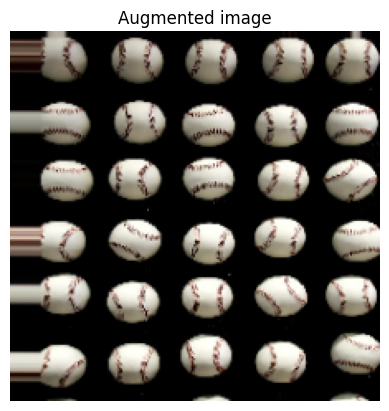

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}" )
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.7144 - val_accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 1s 875ms/step - loss: 0.6860 - accuracy: 0.5357 - val_loss: 0.7221 - val_accuracy: 0.3333
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 0.6804 - accuracy: 0.6071 - val_loss: 0.7299 - val_accuracy: 0.3333
Epoch 4/5
1/1 [==============================] - 1s 878ms/step - loss: 0.6813 - accuracy: 0.5357 - val_loss: 0.7346 - val_accuracy: 0.3333
Epoch 5/5
1/1 [==============================] - 1s 874ms/step - loss: 0.6708 - accuracy: 0.5357 - val_loss: 0.7374 - val_accuracy: 0.3333


In [ ]:
# Import data and augment it and shuffle it from training direcotry
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 28 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 0.6788 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 0.6701 - accuracy: 0.6429 - val_loss: 0.6922 - val_accuracy: 0.4167
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 0.6499 - accuracy: 0.7143 - val_loss: 0.6963 - val_accuracy: 0.4167
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.6504 - accuracy: 0.6429 - val_loss: 0.7023 - val_accuracy: 0.4167


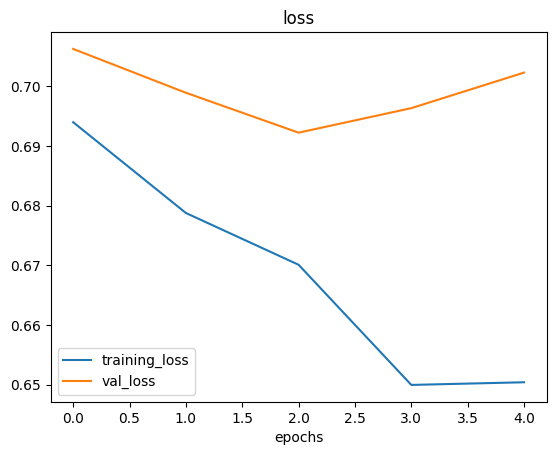

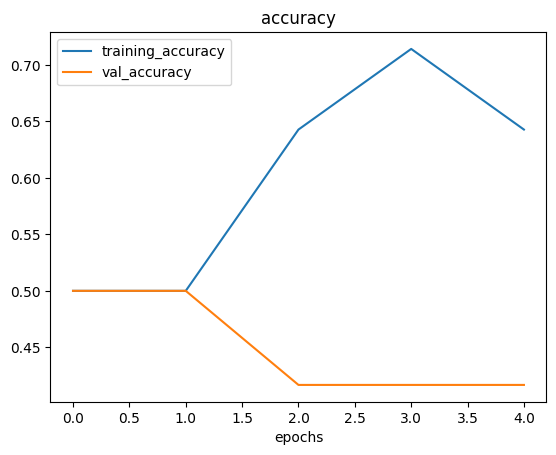

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

In [ ]:
model_1.evaluate(test_data)
model_2.evaluate(test_data)
model_3.evaluate(test_data)
model_4.evaluate(test_data)
model_5.evaluate(test_data)
model_6.evaluate(test_data)
model_7.evaluate(test_data)

1/1 [==============================] - 0s 212ms/step - loss: 0.7023 - accuracy: 0.4167


[0.702305018901825, 0.4166666567325592]

Hence model 4 is the best option

### 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (this will be our baseline, a convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # the size of a sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6959 - accuracy: 0.4643 - val_loss: 0.8828 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.6731 - accuracy: 0.5000 - val_loss: 0.7491 - val_accuracy: 0.3333 - lr: 1.1220e-04
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.5415 - accuracy: 0.8929 - val_loss: 0.7984 - val_accuracy: 0.6667 - lr: 1.2589e-04
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.5348 - accuracy: 0.6429 - val_loss: 0.8148 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.4416 - accuracy: 0.8571 - val_loss: 0.9416 - val_accuracy: 0.3333 - lr: 1.5849e-04
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.3940 - accuracy: 0.9643 - val_loss: 1.0814 - val_accuracy: 0.3333 - lr: 1.7783e-04
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.3737 

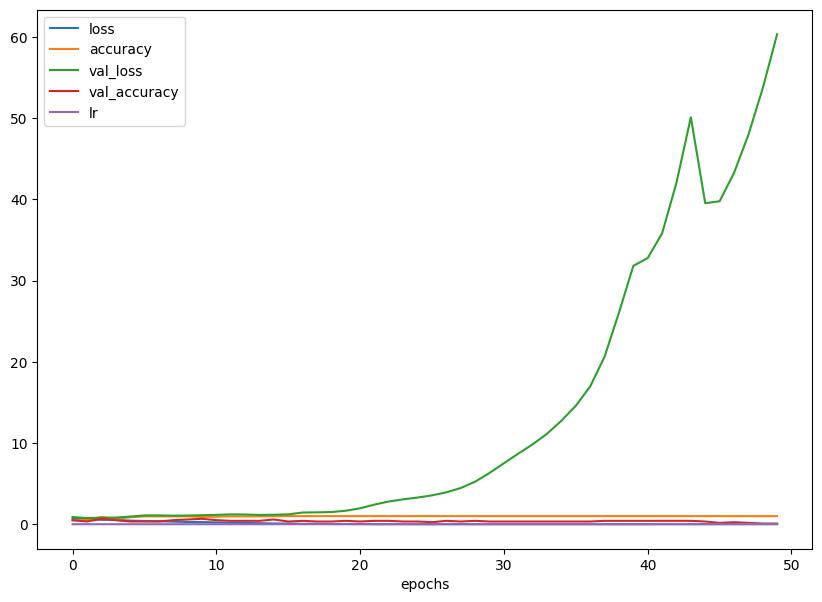

In [ ]:
# Checkout the history
pd.DataFrame(history_4.history).plot(figsize=(10, 7), xlabel="epochs");

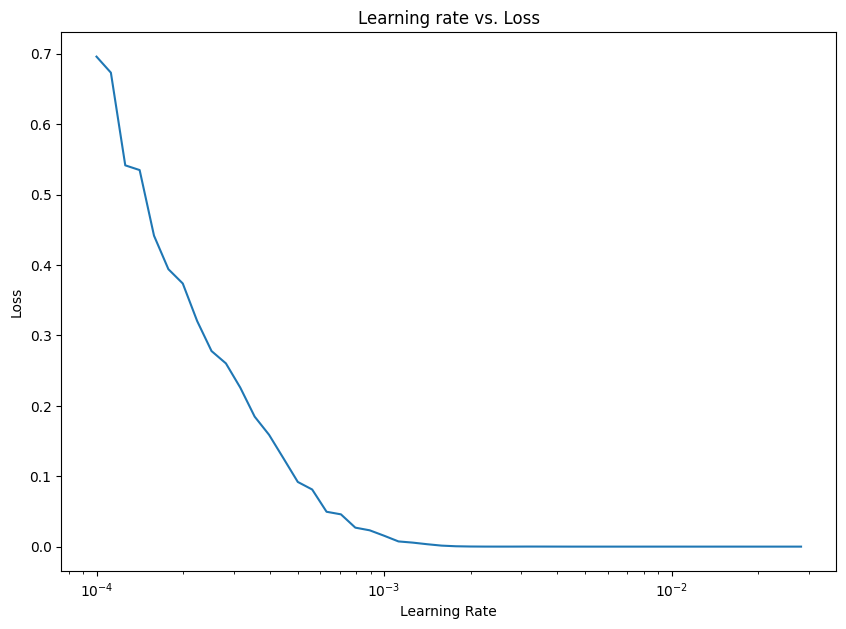

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (this will be our baseline, a convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # the size of a sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(learning_rate=1e-3),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6911 - accuracy: 0.4286 - val_loss: 2.7553 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 1.3320 - accuracy: 0.5000 - val_loss: 4.0425 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 2.5353 - accuracy: 0.5000 - val_loss: 2.2548 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.9068 - accuracy: 0.5000 - val_loss: 1.3932 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.3205 - accuracy: 0.9286 - val_loss: 2.4512 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.7718 - accuracy: 0.7857 - val_loss: 2.5249 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.7753 - accuracy: 0.7857 - val_loss: 1.9959 - val_accuracy: 0.4167
Epoch 8/50
1/1 [=========================

In [ ]:
model_4.evaluate(test_data)

1/1 [==============================] - 0s 364ms/step - loss: 0.2193 - accuracy: 0.9167


[0.21929842233657837, 0.9166666865348816]


## 📖 03. Computer vision & convolutional neural networks in TensorFlow Extra-curriculum
* Watch: [MIT's Introduction to Deep Computer Vision lecture](https://www.youtube.com/watch?v=uapdILWYTzE&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3&ab_channel=AlexanderAmini). This will give you a great intuition behind convolutional neural networks.
* Watch: Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use batches to train models, this technical overview covers many of the reasons why.
* Read: [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing.
* Read: ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.
* Code practice: [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.